# EPFL Open Repository Data Extraction

## OA MONITOR API

- Research Institutes of the ETH Domain
- Universities / ETH / EPF

Legend for type: 

Found here in OAM Typology: https://oamonitor.ch/wiki/open-access-typology/

- 0: Closed
- 2: Green
- 6: Hybrid
- 7: Gold

In [1]:
import requests
by_institution_category = 'https://oam.oamonitor.ch/api/data/public?query={"aggregate": "Publications","cursor": {batchSize: 1000},"allowDiskUse": true,"pipeline": [{"$match": {"year": {"$gte": 2018, "$lte":2022}}},{"$unwind": "$dim.organisations"},{"$group": {"_id":{"type": "$dim.organisations.type", "oa_type": "$oa_color", "year": "$year"}, "distinct": {"$addToSet": "$_id"}}}, {$project: {count:{"$size":"$distinct"}}}]}'

r = requests.get(by_institution_category)

In [2]:
%matplotlib inline
import pandas as pd

listDict = [ {**i['_id'], 'count': i['count'] } for i in r.json()['cursor']['firstBatch']]
df = pd.DataFrame(listDict).sort_values(by=['year'])
df

,type,oa_type,year,count
100,NaN,0,2018,537
60,Universities of Applied Sciences,0,2018,487
61,Universities / ETH / EPF,0,2018,12001
63,University hospitals,6,2018,607
65,University hospitals,7,2018,1907
...,...,...,...,...
52,Universities of Applied Sciences,2,2022,123
55,Universities of Applied Sciences,7,2022,693
56,Universities of Applied Sciences,0,2022,382
95,Universities of Teacher Education,6,2022,70


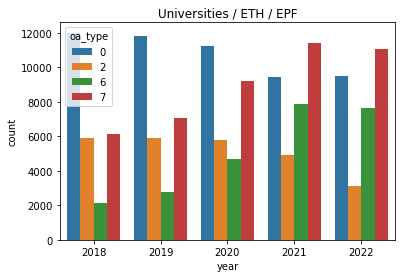

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.barplot(data=df[ df['type'] == 'Universities / ETH / EPF' ], x="year", y="count", hue='oa_type')
plt.title('Universities / ETH / EPF')
plt.show()

### Request only for EPFL publications

I think this is just for publications in journals. This would not include another sources such as books or conference papers. This is still to be confirmed. Otherwise, I will need to parse directly the XLSX files in the switchdrive. 

Database structrure: https://oamonitor.ch/wiki/database-schema/

Improvements: 

- Get Information about authors
- Get Information about publication type

In [7]:
import requests
by_institution_category = 'https://oam.oamonitor.ch/api/data/public?query={"aggregate": "Publications", "cursor": {batchSize: 2000},"allowDiskUse": true,"pipeline": [{"$match": {"year": {"$gte": 2018, "$lte":2022}}},{"$unwind": "$dim.organisations"}, {"$group": {"_id":{"name": "$dim.organisations.name", "oa_type": "$oa_color", "year": "$year"}, "distinct": {"$addToSet": "$_id"}}}, {$project: {count:{"$size":"$distinct"}}}]}'

r = requests.get(by_institution_category)
len(r.json()['cursor']['firstBatch'])

1260

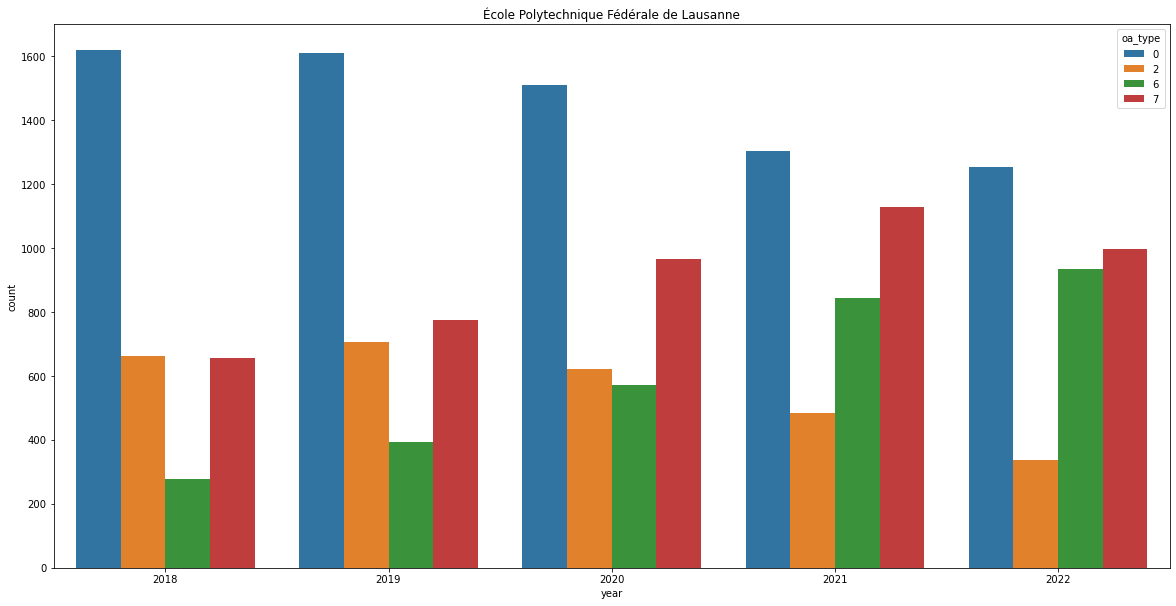

In [8]:
plt.figure(figsize=(20,10))
listDict = [ {**i['_id'], 'count': i['count'] } for i in r.json()['cursor']['firstBatch']]
df = pd.DataFrame(listDict).sort_values(by=['year'])

sns.barplot(data=df[ df['name'] == 'École Polytechnique Fédérale de Lausanne' ], x="year", y="count", hue='oa_type')
plt.title('École Polytechnique Fédérale de Lausanne')
plt.show()

## Parsing Open Repository Database


On this main excel downloaded manually we can find: 

- Resource type
- Period
- OA type - basic
- OA type - advanced
- Number of items

Key: 'Swiss Federal Institute of Technology in Lausanne'

In [10]:
import pandas as pd

df = pd.read_excel('data/2018-2021_repo-data_ALL_2022-11-01.xlsx')
epflDF = df[df['Institution name "en"'] == 'Swiss Federal Institute of Technology in Lausanne']
epflDF

,"Institution name ""en""","Institution name ""de""","Institution name ""fr""",Institution (RORid),"Institution category ""en""","Institution category ""de""","Institution category ""fr""",Period,Resource type,OA type - basic,OA type - advanced,Number of items
900,Swiss Federal Institute of Technology in Lausanne,École Polytechnique Fédérale de Lausanne,École Polytechnique Fédérale de Lausanne,02s376052,Universities (incl. university hospitals) / ET...,Universitäten (inkl. Unispitäler) / ETH,Universités (incl. hôpitaux universitaires) / EPF,2021,Book,Closed,Closed,20
901,Swiss Federal Institute of Technology in Lausanne,École Polytechnique Fédérale de Lausanne,École Polytechnique Fédérale de Lausanne,02s376052,Universities (incl. university hospitals) / ET...,Universitäten (inkl. Unispitäler) / ETH,Universités (incl. hôpitaux universitaires) / EPF,2021,Book,Open,Gold,2
902,Swiss Federal Institute of Technology in Lausanne,École Polytechnique Fédérale de Lausanne,École Polytechnique Fédérale de Lausanne,02s376052,Universities (incl. university hospitals) / ET...,Universitäten (inkl. Unispitäler) / ETH,Universités (incl. hôpitaux universitaires) / EPF,2021,Book,Open,Green,4
903,Swiss Federal Institute of Technology in Lausanne,École Polytechnique Fédérale de Lausanne,École Polytechnique Fédérale de Lausanne,02s376052,Universities (incl. university hospitals) / ET...,Universitäten (inkl. Unispitäler) / ETH,Universités (incl. hôpitaux universitaires) / EPF,2021,Book part,Closed,Closed,66
904,Swiss Federal Institute of Technology in Lausanne,École Polytechnique Fédérale de Lausanne,École Polytechnique Fédérale de Lausanne,02s376052,Universities (incl. university hospitals) / ET...,Universitäten (inkl. Unispitäler) / ETH,Universités (incl. hôpitaux universitaires) / EPF,2021,Book part,Open,Green,7
905,Swiss Federal Institute of Technology in Lausanne,École Polytechnique Fédérale de Lausanne,École Polytechnique Fédérale de Lausanne,02s376052,Universities (incl. university hospitals) / ET...,Universitäten (inkl. Unispitäler) / ETH,Universités (incl. hôpitaux universitaires) / EPF,2021,Conference paper,Closed,Closed,379
906,Swiss Federal Institute of Technology in Lausanne,École Polytechnique Fédérale de Lausanne,École Polytechnique Fédérale de Lausanne,02s376052,Universities (incl. university hospitals) / ET...,Universitäten (inkl. Unispitäler) / ETH,Universités (incl. hôpitaux universitaires) / EPF,2021,Conference paper,Open,Green,95
907,Swiss Federal Institute of Technology in Lausanne,École Polytechnique Fédérale de Lausanne,École Polytechnique Fédérale de Lausanne,02s376052,Universities (incl. university hospitals) / ET...,Universitäten (inkl. Unispitäler) / ETH,Universités (incl. hôpitaux universitaires) / EPF,2021,Conference paper,Open,Hybrid,2
908,Swiss Federal Institute of Technology in Lausanne,École Polytechnique Fédérale de Lausanne,École Polytechnique Fédérale de Lausanne,02s376052,Universities (incl. university hospitals) / ET...,Universitäten (inkl. Unispitäler) / ETH,Universités (incl. hôpitaux universitaires) / EPF,2021,Journal article,Closed,Closed,1049
909,Swiss Federal Institute of Technology in Lausanne,École Polytechnique Fédérale de Lausanne,École Polytechnique Fédérale de Lausanne,02s376052,Universities (incl. university hospitals) / ET...,Universitäten (inkl. Unispitäler) / ETH,Universités (incl. hôpitaux universitaires) / EPF,2021,Journal article,Open,Gold,1055


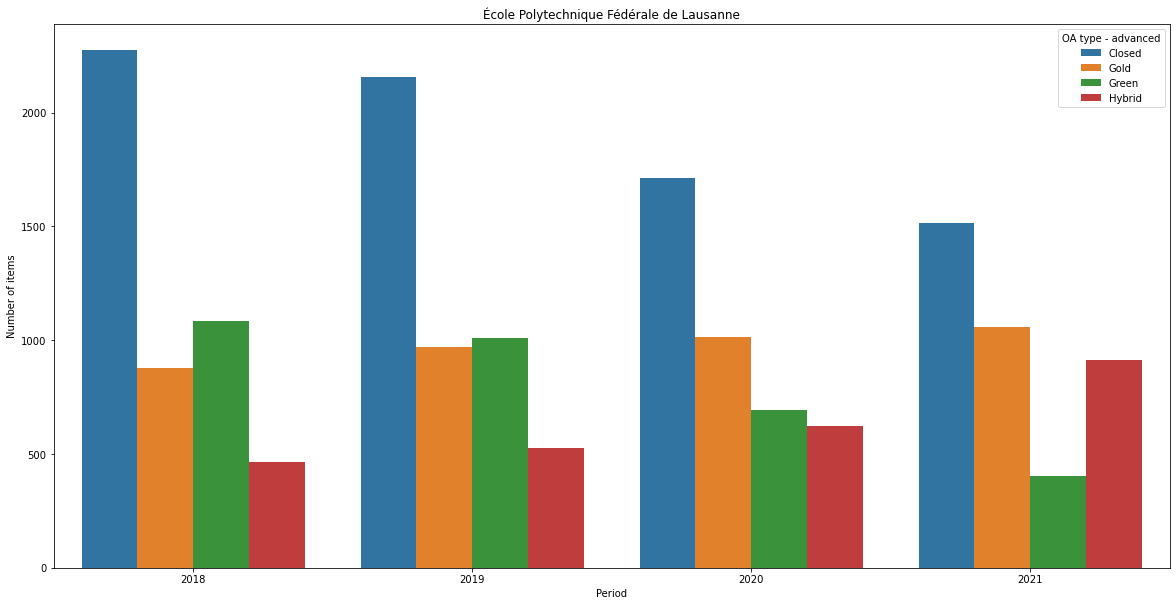

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,10))
sns.barplot(data=epflDF, x="Period", y="Number of items", hue="OA type - advanced", ci=None, estimator=sum)
plt.title('École Polytechnique Fédérale de Lausanne')
plt.show()

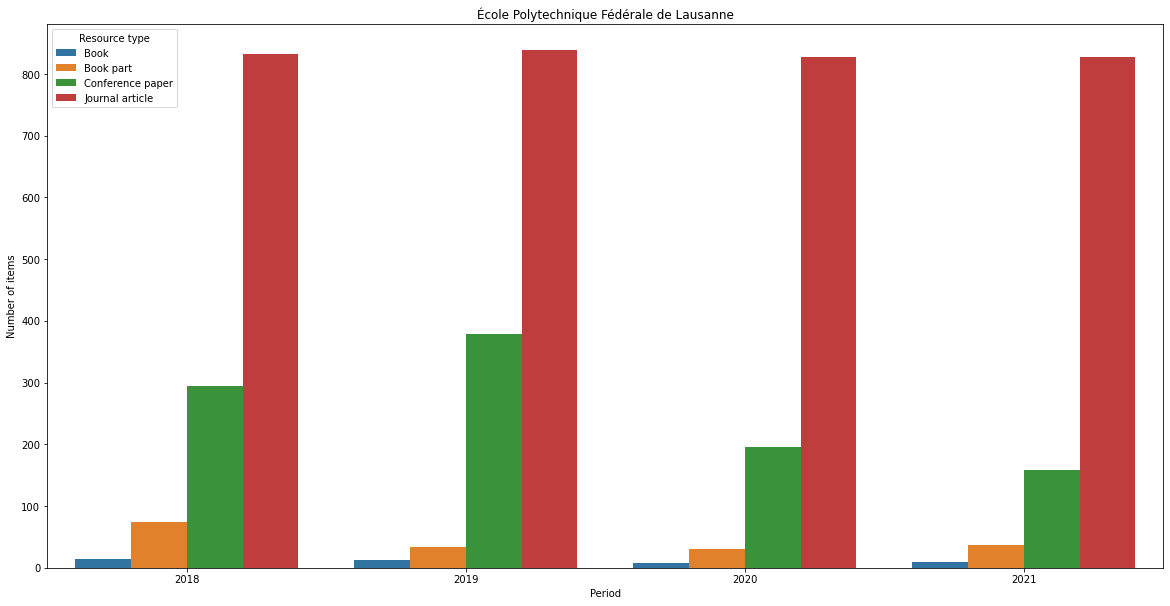

In [12]:
plt.figure(figsize=(20,10))
sns.barplot(data=epflDF, x="Period", y="Number of items", hue="Resource type", ci=None)
plt.title('École Polytechnique Fédérale de Lausanne')
plt.show()

<Figure size 1440x720 with 0 Axes>

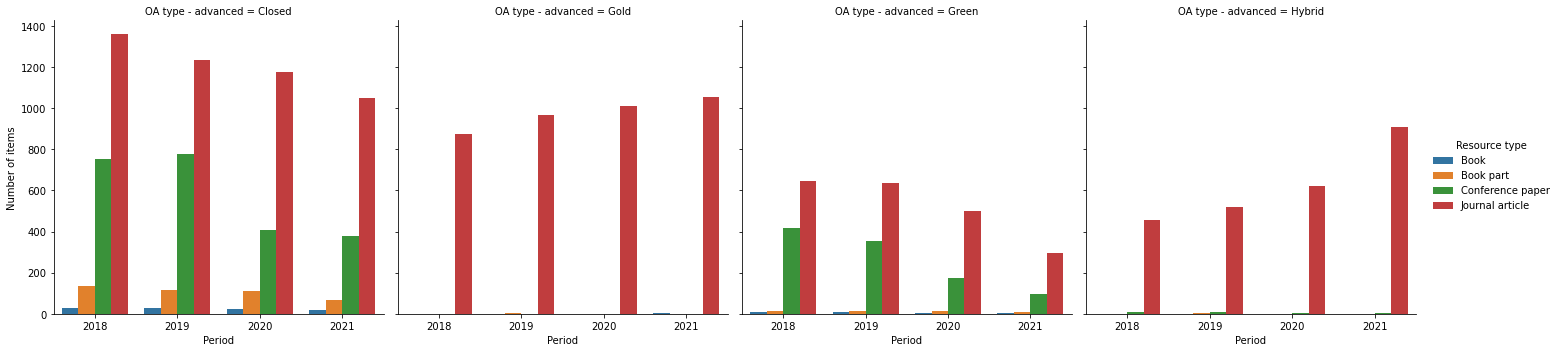

In [13]:
plt.figure(figsize=(20,10))
g = sns.catplot(
    data=epflDF, x="Period", y="Number of items", col="OA type - advanced", hue="Resource type",
    kind="bar", height=5, aspect=1, ci=None)